<a href="https://colab.research.google.com/github/sujin-create/finedu/blob/main/%EA%B8%88%EC%9C%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EB%B6%84%EC%84%9D%EC%9D%84%20%EC%9C%84%ED%95%9C%20%ED%8C%8C%EC%9D%B4%EC%8D%AC%20%ED%99%9C%EC%9A%A9%EB%B2%95/%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D_%EA%B0%95%EC%9D%98_3%EA%B0%95_%EC%9B%B9_%EC%8A%A4%ED%81%AC%EB%9E%98%ED%95%91%EC%9D%84_%EC%82%AC%EC%9A%A9%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 크롤링

크롤링이란 웹 페이지로부터 데이터를 추출하는 행위를 말합니다. 그래서 크롤링하는 소프트웨어는 크롤러(crawler)라고 부르지요. 크롤링에 대해서 본격적으로 들어가기 전에, 우리가 데이터를 수집할 웹에 대해서 먼저 이해해보겠습니다.

우리는 인터넷 익스플로러, 크롬 등과 같은 **'인터넷 브라우저'**를 사용하여 인터넷 세상을 돌아다닙니다. 인터넷 브라우저를 통해서 NAVER, FACEBOOK과 같은 깔끔하고 예쁜 웹 사이트들을 방문할 수 있지요. 그런데 이 웹 사이트들은 실은 HTML이라는 웹 문서로 구성되어져 있습니다.

#2. HTML

### HTML이란?

웹 페이지를 만들기 위한 언어로 웹 브라우저에서 동작하는 언어입니다.

- HT - HyperText, 문서와 문서가 링크로 연결되어져 있다.
- M - Markup, 태그로 이루어져있다.
- L - Language

아래는 간단하게 작성된 HTML 문서의 예제입니다

```html
<!DOCTYPE html>
<html>
  <head>
    <title> HTML 문서 </title>
  </head>
  <body>
    <h1> 이것은 HTML 문서입니다! </h1>
  </body>
</html>
```

HTML 문서는 정해진 문법에 의해서 작성되어져 있습니다. 물론, 네이버와 같은 웹 사이트들의 HTML 문서는 위의 간단한 예제보다는 훨씬 복잡한 구조를 가지고 있겠지요? 웹 페이지에서 마우스 우클릭 후에 '소스 보기'를 클릭하면 HTML 문서의 소스 코드를 확인할 수 있습니다.

http://www.naver.com 으로 이동하여 소스 코드를 확인해봅시다.

아래는 네이버의 HTML 소스 코드 중 일부를 발췌했습니다.

```html
<div class="direct_area">
<a href="http://news.naver.com/" class="link_news" data-clk="newshome">네이버뉴스</a>
<a href="http://entertain.naver.com/home" class="link_direct" data-clk="entertainment">연예</a>
<a href="http://sports.news.naver.com/" class="link_direct" data-clk="sports">스포츠</a>
</div>
```

위와 같이 수많은 꺽쇠들의 조합으로 구성된 것들을 **태그(Tag)**라고 합니다. 위의 HTML 코드는 여러 개의 중첩된 태그로 구성되어져 있는 셈이죠. \<div> 태그, \<a> 태그 등과 같이요.

### 태그란?

- 태그란 정보를 정의하는 형식을 말해요.

### 일반적인 태그의 형식

- <태그명 속성명1="속성값1" 속성명2="속성값2"> 콘텐츠 </태그명>

 : 태그는 콘텐츠를 감싸서 그 정보의 성격과 의미를 정의합니다.

    ex) \<div> ~ \</div>

#3. BeautifulSoup

In [1]:
!pip install beautifulSoup4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# bs4라는 패키지로부터 BeautifulSoup라는 모듈을 임포트
from bs4 import BeautifulSoup

간단한 실습을 통해 BeautifulSoup4의 사용법을 익혀봅시다. 설치할 때는 beautifulSoup4라는 이름으로 설치했지만, 임포트할 때는 from **bs4**라고 적어주셔야 합니다. 설치할 때의 이름과 임포트할 때의 패키지 이름이 항상 동일하지는 않습니다.

이는 BeautifulSoup라는 패키지에서 정한 규칙이니까 따라주세요.

In [3]:
# HTML 문서를 문자열 html로 저장
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

In [4]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

맨 아랫 줄에 있는 코드를 볼까요? BeautifulSoup(입력 문자열, 'html.parser')라는 코드는 이 입력은 HTML 문법으로 작성되어져 있으니 HTML 문법을 기반으로 파싱하라는 의미입니다. 이렇게 인스턴스를 생성하고나면 본격적으로 정보를 가져오는 것은 select()를 가지고 수행합니다.

인스턴스의 이름은 soup이므로 soup.select()를 통해서 정보를 가져옵니다. select()의 사용 방법은 요약하자면 soup.select('찾는 정보')입니다. 구체적인 예시는 다음과 같습니다.

- soup.select('태그명') : 태그를 입력으로 사용할 경우
- soup.select('.클래스명') : 클래스를 입력으로 사용할 경우  
- soup.select('#아이디') : ID를 입력으로 사용할 경우  
- soup.select('상위태그 하위태그') : 자손 관계 (띄어쓰기)
- soup.select('상위태그 > 하위태그') : 자식 관계 ( > )

실습을 통해 이해해볼까요? 태그명 <body>를 입력으로 내부 정보를 가져와보겠습니다.

In [5]:
# <body> 태그를 입력
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


<p> 내부의 정보들을 모두 가져온 것을 확인할 수 있습니다.

이번에는 자손 관계를 입력으로 하여 class가 menu인 경우만을 출력해보겠습니다. 태그명 h1 자손인 클래스 .name의 자손인 클래스 .menu의 정보를 찾으면?

In [6]:
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


class가 menu인 부분의 정보를 잘 가져온 것을 확인할 수 있습니다.

이번에는 의도적으로 잘못된 입력을 넣어볼게요. 태그명 h1은 태그명 html의 자손이기는 하지만, 자식은 아닙니다. 만약, html 자식인 h1의 정보를 가져오라고 하면 어떻게 될까요?

In [7]:
print(soup.select('html > h1'))

[]


아무런 정보도 출력되지 않습니다.

#4. 크롤링 및 차트 그리기

In [8]:
import pandas as pd
from datetime import datetime
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

In [9]:
import requests

In [41]:
url = 'https://finance.naver.com/item/sise_day.nhn?code=005930&page=1'
#삼성전자종목 : 005930

requests라는 패키지에 있는 get이라는 모듈(함수)에 url을 입력으로 하고, 이를 변수에 저장한 후에 변수.text를 하면 해당 URL의 HTML 코드를 받아올 수 있습니다. 앞서 만든 URL로 테스트를 해봅시다.

* response = requests.get(url)  
* response.text

In [42]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36'}
#크롤링 하는 것을 막는 웹사이트를 크롤링하기 위해서는 headers에 user-agent를 넣어서 가져올 수 있음
response = requests.get(url, headers=headers)

headers에 대한 설명 : https://hogni.tistory.com/64  

위의 링크에서 설명하고 있듯이, 유저 에이전트를 인자로 넣어서 get 함수를 사용하면 크롤링 방지 차단을 뚫고 크롤링을 할 수 있습니다. 위의 headers값은 강사의 브라우저에서 추출한 값으로 여러분들은 여러분들의 에이전트 정보를 추출해서 사용하셔도 됩니다!

In [43]:
response.text

'\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr">\n<title>네이버 금융</title>\n\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/newstock.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/common.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/layout.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/main.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/newstock2.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/newstock3.css">\n<link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/imgstock/static.pc/20220615142521/css/world.css">\n</head>\n<body>\n<script

In [44]:
from bs4 import BeautifulSoup as bs

html = bs(response.text, 'html.parser')
html_table = html.select("table")

print(len(html_table))
html_table[0]


2


<table cellspacing="0" class="type2">
<tr>
<th>날짜</th>
<th>종가</th>
<th>전일비</th>
<th>시가</th>
<th>고가</th>
<th>저가</th>
<th>거래량</th>
</tr>
<tr>
<td colspan="7" height="8"></td>
</tr>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td align="center"><span class="tah p10 gray03">2022.07.05</span></td>
<td class="num"><span class="tah p11">57,200</span></td>
<td class="num">
<img alt="상승" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_up.gif" style="margin-right:4px;" width="7"/><span class="tah p11 red02">
				100
				</span>
</td>
<td class="num"><span class="tah p11">57,600</span></td>
<td class="num"><span class="tah p11">58,200</span></td>
<td class="num"><span class="tah p11">57,200</span></td>
<td class="num"><span class="tah p11">14,063,753</span></td>
</tr>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td align="center"><span class="tah p10 gray03">2022.07.04</span></td>
<td class="num"><span class="tah p11">57,100</span></td>
<t

In [45]:
html_table[1] # 크롤링을 원했던 데이터는 html_table[0]에 저장되어있음을 확인가능.

<table align="center" class="Nnavi" summary="페이지 네비게이션 리스트">
<caption>페이지 네비게이션</caption>
<tr>
<td class="on">
<a href="/item/sise_day.nhn?code=005930&amp;page=1">1</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=2">2</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=3">3</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=4">4</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=5">5</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=6">6</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=7">7</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=8">8</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=9">9</a>
</td>
<td>
<a href="/item/sise_day.nhn?code=005930&amp;page=10">10</a>
</td>
<td class="pgR">
<a href="/item/sise_day.nhn?code=005930&amp;page=11">
				다음<img alt="" border="0" height="5" src="https://ssl.pstatic.net/static/n/cmn/bu_pgarR.gif" width="3"/>
</a>
</td>
<td class="p

In [46]:
table = pd.read_html(str(html_table))
# 주어진 html 코드로부터 pandas의 dataframe으로 저장하는 것 => read_html함수

In [47]:
table[0]

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022.07.05,57200.0,100.0,57600.0,58200.0,57200.0,14063753.0
2,2022.07.04,57100.0,900.0,56100.0,57400.0,55700.0,17807126.0
3,2022.07.01,56200.0,800.0,56900.0,57500.0,55900.0,24982097.0
4,2022.06.30,57000.0,1000.0,57200.0,57600.0,57000.0,18915142.0
5,2022.06.29,58000.0,1400.0,58500.0,58800.0,58000.0,14677138.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2022.06.28,59400.0,600.0,59200.0,59500.0,58700.0,13540538.0


In [48]:
table[0].dropna()

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.07.05,57200.0,100.0,57600.0,58200.0,57200.0,14063753.0
2,2022.07.04,57100.0,900.0,56100.0,57400.0,55700.0,17807126.0
3,2022.07.01,56200.0,800.0,56900.0,57500.0,55900.0,24982097.0
4,2022.06.30,57000.0,1000.0,57200.0,57600.0,57000.0,18915142.0
5,2022.06.29,58000.0,1400.0,58500.0,58800.0,58000.0,14677138.0
9,2022.06.28,59400.0,600.0,59200.0,59500.0,58700.0,13540538.0
10,2022.06.27,58800.0,400.0,59000.0,59900.0,58300.0,18122236.0
11,2022.06.24,58400.0,1000.0,57900.0,59100.0,57700.0,23256103.0
12,2022.06.23,57400.0,200.0,57700.0,58000.0,56800.0,28338608.0
13,2022.06.22,57600.0,900.0,59000.0,59100.0,57600.0,23334687.0


In [40]:
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005930'  
for page in range(1, 100):
    page_url = '{}&page={}'.format(sise_url, page)
    print(page_url)

    # 위에서 했던 일련의 과정들을 각 url에 대해서 (99페이지에 대해서 반복)
    response = requests.get(page_url, headers=headers)
    html = bs(response.text, 'html.parser')
    html_table = html.select("table")
    table = pd.read_html(str(html_table))

    # 현재 얻은 데이터프레임을 기존 데이터프레임에 누적.
    df = df.append(table[0].dropna())

https://finance.naver.com/item/sise_day.nhn?code=005930&page=1
https://finance.naver.com/item/sise_day.nhn?code=005930&page=2
https://finance.naver.com/item/sise_day.nhn?code=005930&page=3
https://finance.naver.com/item/sise_day.nhn?code=005930&page=4
https://finance.naver.com/item/sise_day.nhn?code=005930&page=5
https://finance.naver.com/item/sise_day.nhn?code=005930&page=6
https://finance.naver.com/item/sise_day.nhn?code=005930&page=7
https://finance.naver.com/item/sise_day.nhn?code=005930&page=8
https://finance.naver.com/item/sise_day.nhn?code=005930&page=9
https://finance.naver.com/item/sise_day.nhn?code=005930&page=10
https://finance.naver.com/item/sise_day.nhn?code=005930&page=11
https://finance.naver.com/item/sise_day.nhn?code=005930&page=12
https://finance.naver.com/item/sise_day.nhn?code=005930&page=13
https://finance.naver.com/item/sise_day.nhn?code=005930&page=14
https://finance.naver.com/item/sise_day.nhn?code=005930&page=15
https://finance.naver.com/item/sise_day.nhn?code=

In [49]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
1,2022.07.05,57200.0,100.0,57600.0,58200.0,57200.0,14063753.0
2,2022.07.04,57100.0,900.0,56100.0,57400.0,55700.0,17807126.0
3,2022.07.01,56200.0,800.0,56900.0,57500.0,55900.0,24982097.0
4,2022.06.30,57000.0,1000.0,57200.0,57600.0,57000.0,18915142.0
5,2022.06.29,58000.0,1400.0,58500.0,58800.0,58000.0,14677138.0
...,...,...,...,...,...,...,...
9,2018.07.05,45950.0,300.0,46100.0,46550.0,45600.0,7039773.0
10,2018.07.04,46250.0,100.0,46700.0,47050.0,46050.0,8776763.0
11,2018.07.03,46150.0,600.0,45750.0,46450.0,45750.0,10959655.0
12,2018.07.02,45550.0,1100.0,46500.0,47150.0,45500.0,13112253.0


최근 데이터 30행만 사용하겠습니다. 네이버 금융의 데이터가 내림차순으로 되어져 있으므로 오름차순으로 변경합니다.

In [50]:
df = df.dropna()
df = df.iloc[0:30] 
df = df.sort_values(by='날짜') 

In [51]:
df

,날짜,종가,전일비,시가,고가,저가,거래량
13,2022.05.23,67900.0,100.0,68800.0,68800.0,67600.0,13684088.0
12,2022.05.24,66500.0,1400.0,67500.0,67700.0,66500.0,15482576.0
11,2022.05.25,66400.0,100.0,66700.0,67100.0,65900.0,15150490.0
10,2022.05.26,65900.0,500.0,66300.0,67200.0,65500.0,15970890.0
9,2022.05.27,66500.0,600.0,66700.0,66900.0,66200.0,11405555.0
5,2022.05.30,67700.0,1200.0,67500.0,67800.0,66900.0,14255484.0
4,2022.05.31,67400.0,300.0,67500.0,67500.0,66700.0,24365002.0
3,2022.06.02,66700.0,700.0,66600.0,67000.0,66400.0,14959443.0
2,2022.06.03,66800.0,100.0,67200.0,67300.0,66800.0,8222883.0
1,2022.06.07,65500.0,1300.0,66200.0,66400.0,65400.0,19355755.0


In [52]:
len(df)

30

 x축 레이블의 날짜가 겹쳐서 보기어려우므로 90도 회전하여 표시했습니다.  

x축은 날짜 데이터로 y축은 종가 데이터로 출력합니다. co는 좌표를 청록색(cyan) 원으로, -는 각 좌표를 실선으로 연결해서 표시합니다.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8 missing from current font.
  font.set_text(s, 0, flags=flags)


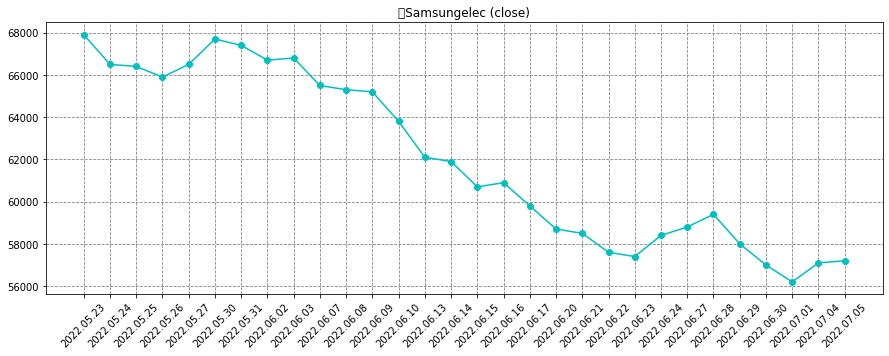

In [53]:
plt.figure(figsize=(15, 5)) 
plt.title('Samsungelec (close)')
plt.xticks(rotation=45) 
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

##4-1. 구버전 캔들차트

이번에는 캔들 차트를 그려봅시다.

캔들차트 : https://m.blog.naver.com/freeism_7/221866826086

캔들 차트를 그리는 패키지는 구버전과 신저번이 있습니다.  

패키지명이 비슷한데, 패키지명 중간에 하이픈(-)이나 언더스코어(_)가 있으면 예전 패키지이고, 중간에 아무 문자도 없는 것이 새로운 패키지입니다.  

이 영상에서는 구버전, 새로운 신버전 두 가지 모두를 소개하겠습니다. 수강생분들은 가급적이면 새로운 패키지 버전을 사용하는 것을 권장드립니다.  

구버전 : !pip install --upgrade mpl_finance  
신버전 : !pip install --upgrade mplfinance

우선 구버전을 사용해봅시다.

In [54]:
pip install --upgrade mpl_finance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from mpl_finance import candlestick_ohlc

우선 구버전으로 캔들 차트를 그려봅시다.

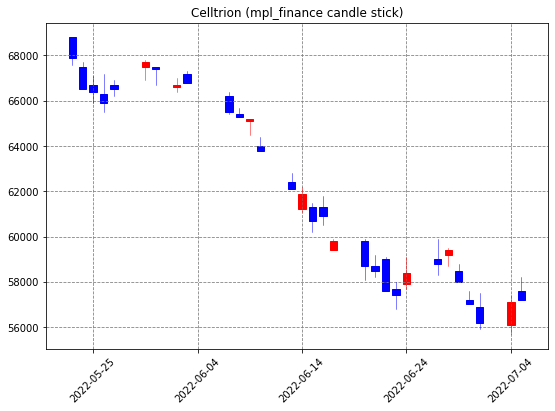

In [56]:
df = df.sort_values(by='날짜')

for idx in range(0, len(df)):
    # 날짜열의 %Y.%m.%d 형식 문자열을 datetime 형으로 변환.
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date() 
    # datetime 형을 float 형으로 변환
    df['날짜'].values[idx] = mdates.date2num(dt)
  
# 날짜(float 형), 시가, 고가, 저가, 종가 열만 갖는 별도의 데이터프레임 생성
# 이렇게 하는 이유는 candlestick_ohlc 함수에서 요구하는 형식이기 때문.
ohlc = df[['날짜','시가','고가','저가','종가']]

plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Celltrion (mpl_finance candle stick)')

# candlestick_ohlc 함수를 이용하여 캔들차트를 그린다.
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue')

# x축의 레이블이 숫자. %Y-%m-%d 형식 문자열로 변환하여 표시
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()

위의 그림처럼 캔들 차트를 이용하면 종가만 표시했을 때는 보이지 않던 하룻 동안의 주가 변동폭을 한 눈에 살펴볼 수 있어 좋지만, 캔들 차트를 그리려면 candlestick_ohlc() 함수를 써야 하는데, 이 함수를 호출하려면 두번째 인수를 (time(float 타입), open, high, low, close, ...) 형태로 넘겨주어야 합니다.

특히 time은 반드시 float 형태로 넘겨줘야 해서 시간 데이터를 매번 float 형태로 변경해서 처리해야 합니다. 또한 x축의 레이블을 표시하려면 다시 일자 형식으로 변경해야하므로 여러모로 불편한 점이 있습니다.  

여기까지 구버전 패키지의 사용법이고, 가급적 여러분들이 사용하기를 권장드리는 신버전 패키지의 사용법을 말씀드리겠습니다.

##4-2. 신버전 캔들차트

신버전 패키지 엠피엘파이낸스 패키지를 이용하면 캔들 차트를 더 쉽게 그릴 수 있습니다. 엠피엘파이낸스의 가장 큰 장점은 OHLC 데이터 열과 날짜시간 인덱스(DatetimeIndex)를 포함한 데이터프레임만 있으면 기존에 사용자들이 수동으로 처리했던 데이터 변환 작업을 모두 자동화해준다는 점입니다.

import mplfinance as mpf  
mpf.plot(OHLC 데이터프레임, [, title=차트제목] [,  type=차트형태] [, mav=이동평균선] [, volume=거래량 표시여부] [, ylabel=y축레이블])

새로운 패키지는 워낙 사용법이 간단하므로 코드를 통해 이해해봅시다. 앞서 작성한 코드를 거의 그대로 사용합니다.

In [57]:
# 이전과는 달리 mpl_finance가 아니라 mplfinance이다. 언더바를 뺀다.
!pip install --upgrade mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70 kB 6.6 MB/s 


In [58]:
import mplfinance as mpf

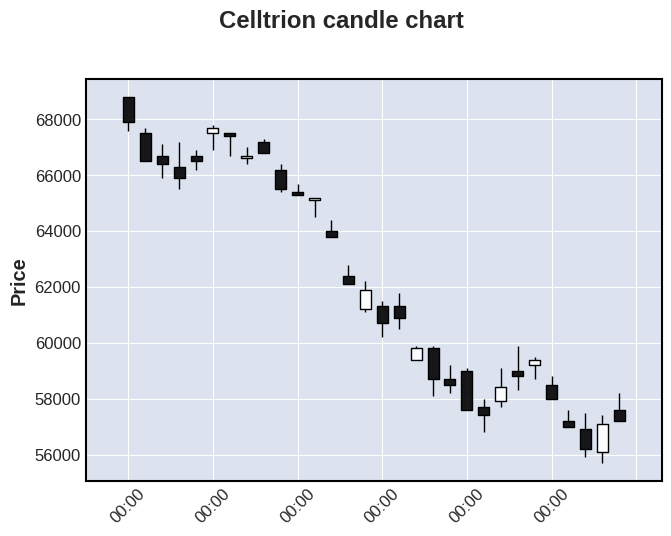

In [59]:
# 한글 컬럼명을 영어 컬럼명으로 변경
df = df.rename(columns={'날짜':'Date', '시가':'Open', '고가':'High', '저가':'Low', '종가':'Close', '거래량':'Volume'})

# 네이버 데이터는 날짜가 내림차순 정렬이므로 오름차순으로 변경
df = df.sort_values(by='Date')

# Date 컬럼을 DatetimeIndex 타입으로 변경 후 인덱스로 설정
df.index = pd.to_datetime(df.Date)

# Open, High, Low, Close, Volume 컬럼만 갖도록 데이터프레임 구조 변경
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# 코드 한 줄로 캔들 차트 그리기
mpf.plot(df, title='Celltrion candle chart', type='candle')

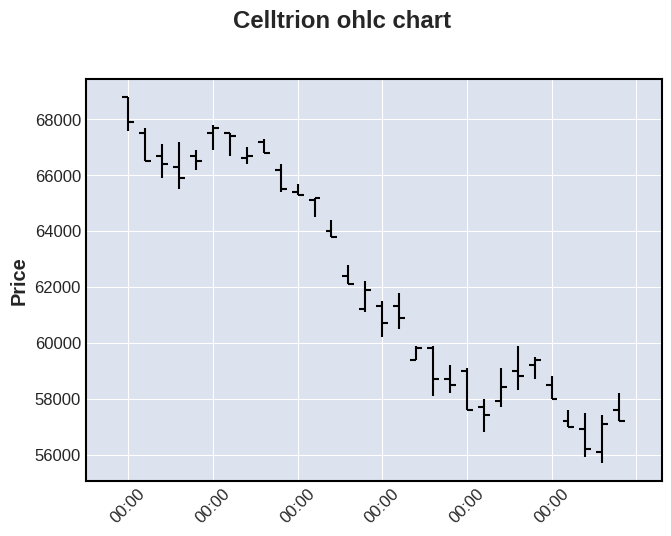

In [60]:
# type 인수를 ohlc로 변경하면 또 다른 종류의 차트를 출력할 수 있다.
mpf.plot(df, title='Celltrion ohlc chart', type='ohlc')

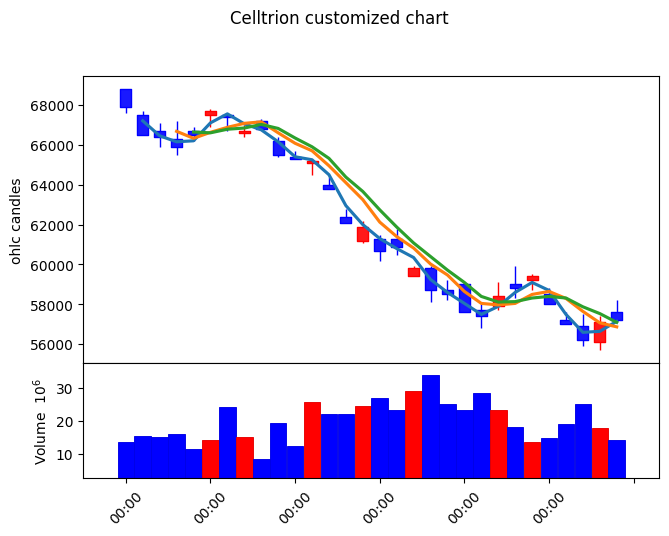

In [66]:
# 캔들의 색상을 바꾸거나 차트 하단에 그래프를 추가하여 거래량 표시도 가능하다.
# 심지어 이동 평균선도 세 개까지 지정해서 출력할 수 있다.

# kwargs는 keyword arguments의 약자이며 mpf.plot() 함수를 호출할 때 쓰이는 여러 인수를 담는 딕셔너리.
kwargs = dict(title='Celltrion customized chart', type='candle',
    mav=(2, 4, 5), volume=True, ylabel='ohlc candles')

# 마켓 색상은 스타일을 지정하는 필수 객체로, 상승은 red, 하락은 blue로 지정.
mc = mpf.make_marketcolors(up='r', down='b', inherit=True)
s  = mpf.make_mpf_style(marketcolors=mc)

# 셀트리온 시세 OHLVC 데이터와 kwargs로 설정한 인수들과 스타일 객체를 인수로 넘겨주면서
# mpf.plot() 함수를 호출하여 차트를 출력
mpf.plot(df, **kwargs, style=s)

핵심 요약  
캔들 차트를 그리려면 예전 방식인 엠피엘_파이낸스(mpl_finance)를 사용하는 방법과 새로 출시된 엠피엘파이낸스(mplfinance) 패키지를 사용하는 방법이 있다. 엠피엘파이낸스 패키지는 데이터프레임 형태의 시세 데이터만 있으면 기존 패키지에서 사용자가 직접 수행하던 작업을 자동화하여 캔들 차트로 바로 출력한다.

# Quiz

아래와 같은 문자열이 있다고 해봅시다.

In [67]:
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> T-shirts </span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> Accessory </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

## Quiz #1

위 문자열로부터 soup.select()를 사용하여 다음의 결과를 얻으세요.


예시 결과
```
[<span class="menu"> T-shirts </span>, <span class="menu"> Accessory </span>]
```

예시 결과만 동일하면 정답입니다. 정답은 한 개가 아닙니다.

In [70]:
soup = BeautifulSoup(html, 'html.parser')
soup.select('h1 .menu')

[<span class="menu"> T-shirts </span>, <span class="menu"> Accessory </span>]

##Quiz #1 풀이

In [ ]:
# bs4라는 패키지로부터 BeautifulSoup라는 모듈을 임포트
from bs4 import BeautifulSoup

In [ ]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
result = soup.select('h1 .name .menu')

In [ ]:
result

[<span class="menu"> T-shirts </span>, <span class="menu"> Accessory </span>]

##Quiz #2

위 문자열로부터 soup.select()를 사용하여 다음의 결과를 얻으세요.

예시 결과
```
[<a href="http://www.naver.com"> 바로가기 </a>,
 <a href="http://www.facebook.com"> 바로가기 </a>]
```

예시 결과만 동일하면 정답입니다. 정답은 한 개가 아닙니다.

In [71]:
soup = BeautifulSoup(html,'html.parser')
soup.select('a')

[<a href="http://www.naver.com"> 바로가기 </a>,
 <a href="http://www.facebook.com"> 바로가기 </a>]

## Quiz #2 풀이

In [ ]:
# bs4라는 패키지로부터 BeautifulSoup라는 모듈을 임포트
from bs4 import BeautifulSoup

In [ ]:
# BeautifulSoup 인스턴스 생성. 두번째 매개변수는 분석할 분석기(parser)의 종류.
soup = BeautifulSoup(html, 'html.parser')

In [ ]:
result = soup.select('a')

In [ ]:
result

[<a href="http://www.naver.com"> 바로가기 </a>,
 <a href="http://www.facebook.com"> 바로가기 </a>]

## Quiz #3

주소 : https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=488

위 주소로부터 테마주 테이블을 추출하여 데이터프레임으로 저장하세요.

In [74]:
response = requests.get(' https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=488')
html = response.text

In [77]:
soup = BeautifulSoup(html,'html.parser')
tables = soup.select('table')
len(tables)

3

In [83]:
print(tables[2])

<table cellpadding="0" cellspacing="0" class="type_5" style="margin:0 0 10px 0 ;" summary="업종별 시세 리스트">
<caption>업종별 시세</caption>
<colgroup>
<col width="*"/>
<col width="11%"/>
<col width="9%"/>
<col width="9%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="8%"/>
<col width="6%"/>
</colgroup>
<thead>
<tr style="height:29px">
<th colspan="2">종목명</th>
<th>현재가</th>
<th>전일비</th>
<th>등락률</th>
<th>매수호가</th>
<th>매도호가</th>
<th>거래량</th>
<th>거래대금</th>
<th>전일거래량</th>
<th>토론실</th>
</tr>
<tr>
<td class="blank_09" colspan="12"></td>
</tr>
</thead>
<tbody>
<tr onmouseout="mouseOut(this)" onmouseover="mouseOver(this)">
<td class="name"><div class="name_area"><a href="/item/main.naver?code=035720">카카오</a> <span class="dot"></span></div></td>
<td>
<div class="theme_info_area">
<a class="btn_history" href="javascript:;" onmouseout="mouseThemeToggle(this)" onmouseover="mouseThemeToggle(this)">
<span class="blind">테마 편입 사유</span>
</a>
<div class="info_layer_wrap" styl

In [113]:
df = pd.read_html(str(tables))

In [114]:
df = df[2]

In [115]:
del df['Unnamed: 11']
del df['토론실']


In [118]:
df
df.dropna()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,카카오,테마 편입 사유,72000.0,3900.0,+5.73%,71900.0,72000.0,2110993.0,150157.0,1019171.0
2,대원미디어 *,테마 편입 사유,11300.0,600.0,+5.61%,11250.0,11300.0,56373.0,630.0,83294.0
3,키다리스튜디오,테마 편입 사유,7320.0,350.0,+5.02%,7310.0,7320.0,77007.0,557.0,103252.0
4,NHN,테마 편입 사유,29550.0,1200.0,+4.23%,29500.0,29550.0,50601.0,1486.0,91988.0
5,엔비티 *,테마 편입 사유,6870.0,250.0,+3.78%,6870.0,6880.0,113649.0,773.0,85535.0
6,미스터블루 *,테마 편입 사유,5290.0,190.0,+3.73%,5280.0,5290.0,20391.0,107.0,38380.0
7,NAVER,테마 편입 사유,243000.0,8000.0,+3.40%,243000.0,243500.0,649975.0,158212.0,512776.0
8,디앤씨미디어 *,테마 편입 사유,20450.0,350.0,+1.74%,20250.0,20450.0,19441.0,398.0,43007.0


## Quiz #3 풀이

In [ ]:
import requests
import pandas as pd
from bs4 import BeautifulSoup as bs

In [ ]:
url = 'https://finance.naver.com/sise/sise_group_detail.nhn?type=theme&no=488'

In [ ]:
headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/88.0.4324.96 Safari/537.36'}
response = requests.get(url, headers=headers)

In [ ]:
response.text

'\n\n\n\n\n\n\n<!--  global include -->\n\n\t\n\t\n\t\n\t\n\t\n<html lang=\'ko\'>\n<head>\n\n\n\t\n\t\n\t\t\n\t\t\t\n\t\t\t\n\t\t\t\t<title>웹툰 : 네이버 금융</title>\n\t\t\t\n\t\t\n\t\n\n\n\n\n\n\t\n\t\n\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\n\n\n<meta http-equiv="Content-Script-Type" content="text/javascript">\n<meta http-equiv="Content-Style-Type" content="text/css">\n\n\n\n\n\n\t\n    \n        <meta property="og:url" content="http://finance.naver.com/sise/sise_group_detail.nhn"/>\n        \n\t\t\t\n\t\t    \n\t\t    \t<meta property="og:title" content="웹툰 : 네이버 금융"/>\n\t\t     \n\t\t\n\t\t\n\t\t\t\n\t\t\t   <meta property="og:description" content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳"/>\n\t\t    \n\t\t    \n\t\t\n\t\t \n\t\t\t\n\t\t\t    <meta property="og:image" content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png"/>\n\t\t    \n\t\t    \n\t\t\n    \n\n<meta property="og:type" content="article"/>\n<meta property="og:article:thumbnailUr

In [ ]:
html = bs(response.text, 'html.parser')
html_table = html.select("table")

len(html_table)

3

In [ ]:
table = pd.read_html(str(html_table))

In [ ]:
table[2]

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량,토론실,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,미스터블루 *,테마 편입 사유,12100.0,550.0,+4.76%,12100.0,12150.0,4828634.0,58839.0,486357.0,NaN,NaN
2,키다리스튜디오,테마 편입 사유,16200.0,400.0,+2.53%,16150.0,16200.0,223689.0,3542.0,209161.0,NaN,NaN
3,카카오,테마 편입 사유,161000.0,3500.0,+2.22%,161000.0,161500.0,4378667.0,706518.0,2045164.0,NaN,NaN
4,NAVER,테마 편입 사유,417500.0,8000.0,+1.95%,417000.0,417500.0,659220.0,273880.0,342771.0,NaN,NaN
5,디앤씨미디어 *,테마 편입 사유,46650.0,800.0,+1.74%,46650.0,46700.0,191750.0,8953.0,269291.0,NaN,NaN
6,NHN,테마 편입 사유,82200.0,1300.0,+1.61%,82100.0,82200.0,98481.0,8077.0,110265.0,NaN,NaN
7,대원미디어 *,테마 편입 사유,36700.0,800.0,-2.13%,36700.0,36750.0,167841.0,6157.0,120273.0,NaN,NaN
8,엔비티 *,테마 편입 사유,27500.0,900.0,-3.17%,27500.0,27550.0,265815.0,7404.0,106374.0,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 불필요한 열 삭제
del table[2]['Unnamed: 11']

In [ ]:
# 결측값 열 삭제
del table[2]['토론실']

In [ ]:
# 결측값 행 삭제
table[2].dropna()

,종목명,종목명.1,현재가,전일비,등락률,매수호가,매도호가,거래량,거래대금,전일거래량
1,미스터블루 *,테마 편입 사유,12100.0,550.0,+4.76%,12100.0,12150.0,4828634.0,58839.0,486357.0
2,키다리스튜디오,테마 편입 사유,16200.0,400.0,+2.53%,16150.0,16200.0,223689.0,3542.0,209161.0
3,카카오,테마 편입 사유,161000.0,3500.0,+2.22%,161000.0,161500.0,4378667.0,706518.0,2045164.0
4,NAVER,테마 편입 사유,417500.0,8000.0,+1.95%,417000.0,417500.0,659220.0,273880.0,342771.0
5,디앤씨미디어 *,테마 편입 사유,46650.0,800.0,+1.74%,46650.0,46700.0,191750.0,8953.0,269291.0
6,NHN,테마 편입 사유,82200.0,1300.0,+1.61%,82100.0,82200.0,98481.0,8077.0,110265.0
7,대원미디어 *,테마 편입 사유,36700.0,800.0,-2.13%,36700.0,36750.0,167841.0,6157.0,120273.0
8,엔비티 *,테마 편입 사유,27500.0,900.0,-3.17%,27500.0,27550.0,265815.0,7404.0,106374.0
